In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_excel('E:/ML_Datasets/insurance_simple.xlsx')

In [5]:
df

,age,have_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,0
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


## Scatter plot

### From scatter plot . we have to understand it maintain S curve and we have to know the outliers from scatter plot

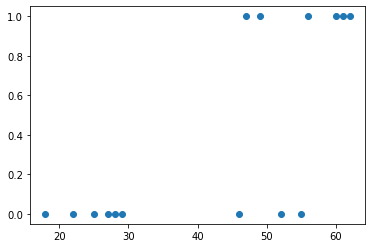

In [7]:
plt.scatter(df['age'],df['have_insurance'])

## Box Plot

### This is the box plot . from box plot we have to understand anamoly detection / outliers detection

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

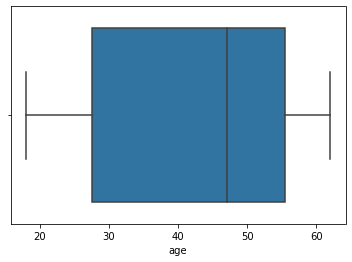

In [9]:
sns.boxplot(df['age'])

## OR

<AxesSubplot:>

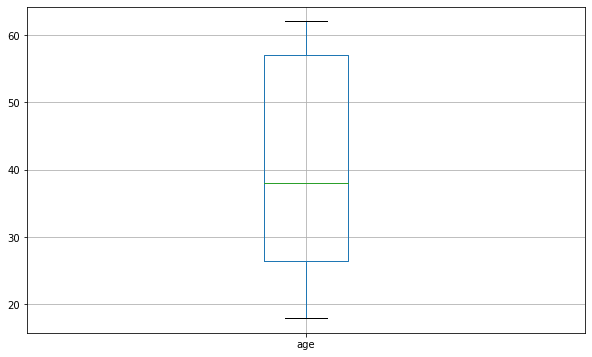

In [46]:
plt.figure(figsize = (10,6))
df1 = pd.DataFrame(df['age'])
df1.boxplot()

### OR

<AxesSubplot:xlabel='age', ylabel='have_insurance'>

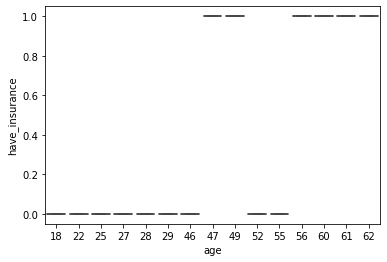

In [11]:
sns.boxplot(x = df['age'] , y = df['have_insurance'], data = df)

In [14]:
df

,age,have_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,0
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


### Here we drop the outliers whose age is greater than 40 as well as who don't take insurance ( which shown in scatter plot or in box plot)

In [15]:
df.drop([3,4,6],axis = 0 , inplace = True)

In [16]:
df

,age,have_insurance
0,22,0
1,25,0
2,47,1
5,56,1
7,60,1
8,62,1
9,61,1
10,18,0
11,28,0
12,27,0


## check data is balance or not

In [17]:
df['have_insurance'].value_counts()

0    6
1    6
Name: have_insurance, dtype: int64

## Count plot for check balance data or not

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='have_insurance', ylabel='count'>

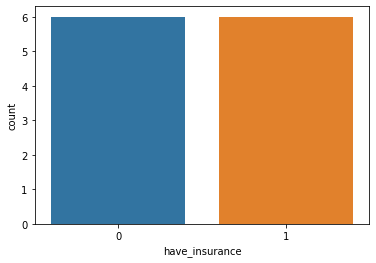

In [47]:
sns.countplot(df['have_insurance'])

## Here Data is balanced . so no need to explicitely balance data

## Data split into feature and target

In [22]:
x = pd.DataFrame(df.iloc[:,0])
y = pd.DataFrame( df.iloc[:,-1])

In [23]:
x.head(2)

,age
0,22
1,25


In [24]:
y.head(2)

,have_insurance
0,0
1,0


## Data split into train and test data

In [25]:
x_train ,x_test , y_train ,y_test = train_test_split(x , y , test_size =0.2 , random_state = 42)

In [26]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()

In [29]:
model.fit(x_train ,y_train)

C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [31]:
y_pred = model.predict(x_test)

In [36]:
y_pred = pd.DataFrame( y_pred, columns =(['prediction_output']))

In [37]:
y_pred

,prediction_output
0,0
1,0
2,0


## Performance matrix or Cost function or Evaluation matrix

In [38]:
from sklearn.metrics import confusion_matrix , classification_report

In [42]:
print(confusion_matrix(y_test , y_pred))

[[3]]


In [41]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

